In [7]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline

In [2]:
drugs = pd.read_csv('34933-0001-Data.tsv',delimiter='\t',encoding='utf-8')

In [3]:
drugs.head()

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
0,1,50886467,2,4,4,991,9991,91,91,91,...,1,1,99,9,9,2,2,1275.597449,30054,2
1,2,13766883,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,2,2,5191.071173,30031,1
2,3,17772877,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,3,3,419.742011,30056,2
3,4,45622817,1,99,99,13,9999,99,2,93,...,1,1,2,1,1,2,2,1449.303889,30054,1
4,5,17239390,1,99,99,11,9999,99,4,93,...,1,1,1,1,1,1,1,15344.293577,30012,2


In [4]:
len(drugs)

55268

In [5]:
drugs.describe()

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
count,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,...,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000,55268.000000
mean,27634.500000,54473368.750000,1.495531,74.620142,74.613755,505.253782,9701.398386,91.732178,46.366342,75.825288,...,2.209778,2.210284,32.607187,3.519939,3.520410,1.662879,1.773486,4705.386933,30030.545958,1.505681
std,15954.641676,25507799.267642,0.499985,41.539121,41.537068,487.743490,1502.084306,16.616273,44.271446,30.064902,...,2.864520,2.864748,45.015042,3.714968,3.714965,0.620556,0.776033,7629.364625,17.218962,0.499972
min,1.000000,10001716.000000,1.000000,1.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.421448,30001.000000,1.000000
25%,13817.750000,32282993.500000,1.000000,4.000000,4.000000,15.000000,9991.000000,91.000000,2.000000,91.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,874.096264,30016.000000,1.000000
50%,27634.500000,54515405.500000,1.000000,99.000000,99.000000,985.000000,9991.000000,91.000000,14.000000,91.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1920.635177,30031.000000,2.000000
75%,41451.250000,76408632.500000,2.000000,99.000000,99.000000,991.000000,9999.000000,99.000000,91.000000,93.000000,...,1.000000,1.000000,99.000000,9.000000,9.000000,2.000000,2.000000,4980.388257,30045.000000,2.000000
max,55268.000000,99999610.000000,2.000000,99.000000,99.000000,997.000000,9999.000000,99.000000,91.000000,98.000000,...,9.000000,9.000000,99.000000,9.000000,9.000000,3.000000,3.000000,144469.113843,30060.000000,2.000000


In [30]:
temps = drugs.CIGTRY
temps = temps[temps < 90]

In [31]:
temps.describe()

count    27520.000000
mean        15.506214
std          3.849068
min          1.000000
25%         13.000000
50%         15.000000
75%         18.000000
max         68.000000
Name: CIGTRY, dtype: float64

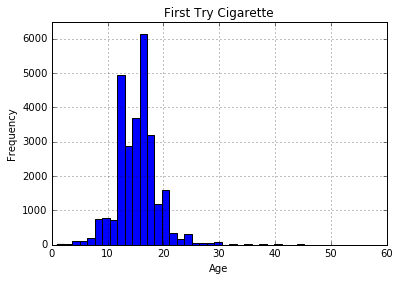

In [52]:
plt.hist(temps, 50)
plt.title("First Try Cigarette")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.axis([0, 60, 0, 6500])
plt.grid(True)